In [1]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Path to the CSV file (update as needed)
csv_file_path = '/kaggle/input/datstrain/LESSDATA.csv'  # Path to your uploaded CSV file

# Read the CSV file with semicolon as delimiter
df = pd.read_csv(csv_file_path)

# Convert age from days to years

# Assign features (X) and target (y)
X = df.drop(columns='target')  
y = df['target']


In [2]:
# Cell 2: Preprocess Data
# Scale the features (necessary for many feature selection methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handling negative values for Chi-Squared
X_non_neg = X_scaled - X_scaled.min(axis=0)  # Make all features non-negative


In [3]:
# Cell 3: Feature Selection with Chi-Squared
from sklearn.feature_selection import SelectKBest, chi2

# Chi-Squared feature selection
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_non_neg, y)
chi2_features = chi2_selector.get_support(indices=True)

print("Chi-Squared selected features:", chi2_features)


Chi-Squared selected features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [4]:
# Cell 4: Feature Selection with ANOVA F-Test
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Selection using ANOVA F-Test
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X_scaled, y)
anova_features = anova_selector.get_support(indices=True)

print("ANOVA F-Test selected features:", anova_features)


ANOVA F-Test selected features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [10]:
# Cell 5: Feature Selection with Mutual Information
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Feature Selection using Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X_scaled, y)
mi_features = mi_selector.get_support(indices=True)

print("Mutual Information selected features:", mi_features)


Mutual Information selected features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [5]:
# Cell 6: Split Data into Train and Test Sets
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Cell 7: Import Necessary Libraries for Model Training
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Cell 8: Create Function to Evaluate Models
from sklearn.ensemble import StackingClassifier

def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'SVM': SVC(probability=True),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'AdaBoost': AdaBoostClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=1000),
    }
    
    # Stacking classifier
    stacking_model = StackingClassifier(
        estimators=[('rf', RandomForestClassifier()), ('svc', SVC(probability=True))],
        final_estimator=LogisticRegression()
    )
    
    # Include stacking in models
    models['Stacking'] = stacking_model
    
    accuracies = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
    return accuracies, models



Model Accuracies with Chi-Squared Features:

                 Model  Accuracy
1              XGBoost  0.985366
3        Random Forest  0.985366
5             Stacking  0.985366
0                  SVM  0.887805
2             AdaBoost  0.878049
4  Logistic Regression  0.795122


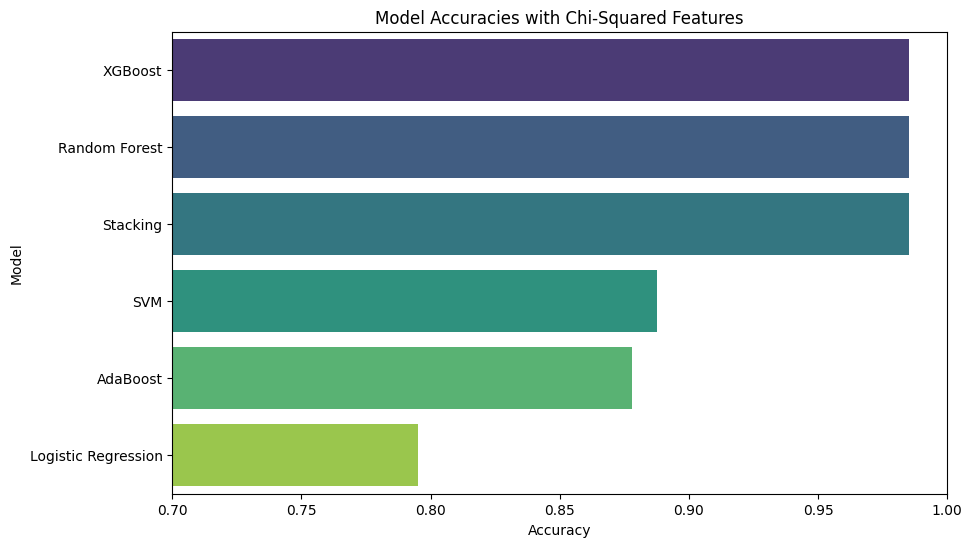

In [8]:
# Cell 9: Evaluate Models with Chi-Squared Features
# Evaluate models for Chi-Squared features
X_train_chi2 = X_train[:, chi2_features]
X_test_chi2 = X_test[:, chi2_features]
chi2_results, chi2_models = evaluate_models(X_train_chi2, X_test_chi2, y_train, y_test)

# Display results for Chi-Squared features
def display_results(results, title):
    results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
    results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
    print(f"\n{title}:\n")
    print(results_df)
    # Plot the results for better visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
    plt.title(title)
    plt.xlim(0.7, 1.0)
    plt.show()

display_results(chi2_results, "Model Accuracies with Chi-Squared Features")



Model Accuracies with ANOVA Features:

                 Model  Accuracy
1              XGBoost  0.985366
3        Random Forest  0.985366
5             Stacking  0.985366
0                  SVM  0.887805
2             AdaBoost  0.878049
4  Logistic Regression  0.795122


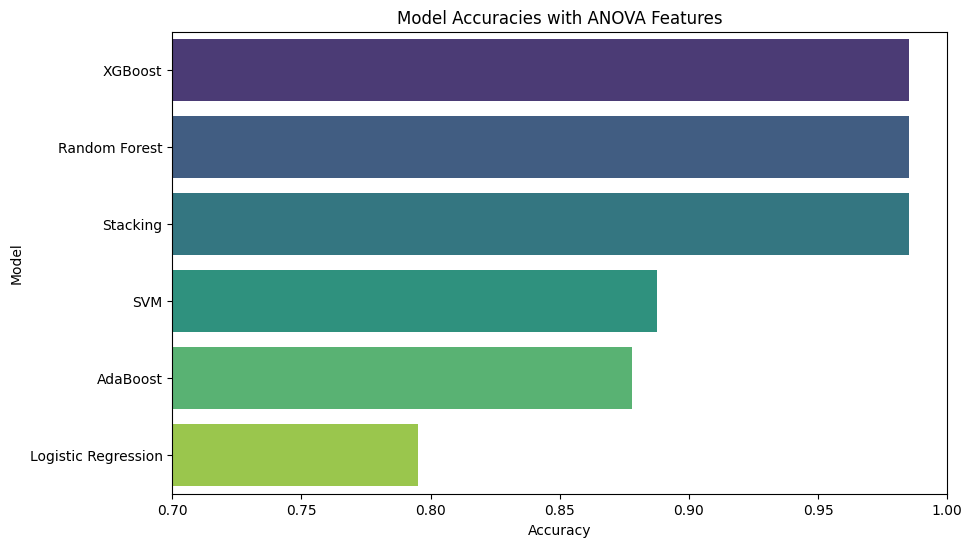


Model Accuracies with Mutual Information Features:

                 Model  Accuracy
1              XGBoost  0.985366
3        Random Forest  0.985366
5             Stacking  0.985366
0                  SVM  0.887805
2             AdaBoost  0.878049
4  Logistic Regression  0.795122


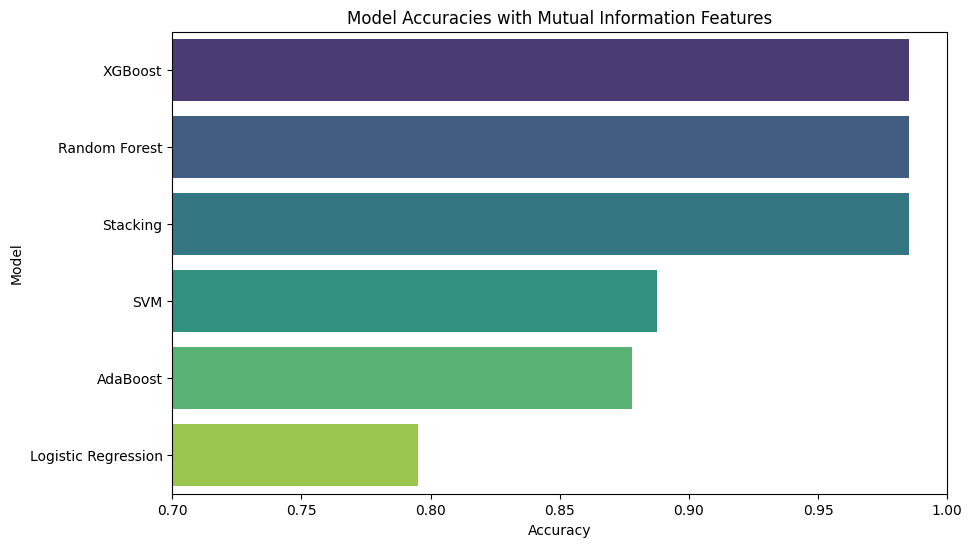

In [11]:
# Cell 10: Evaluate Models with ANOVA and Mutual Information Features
# Evaluate models for ANOVA features
X_train_anova = X_train[:, anova_features]
X_test_anova = X_test[:, anova_features]
anova_results, anova_models = evaluate_models(X_train_anova, X_test_anova, y_train, y_test)
display_results(anova_results, "Model Accuracies with ANOVA Features")

# Evaluate models for Mutual Information features
X_train_mi = X_train[:, mi_features]
X_test_mi = X_test[:, mi_features]
mi_results, mi_models = evaluate_models(X_train_mi, X_test_mi, y_train, y_test)
display_results(mi_results, "Model Accuracies with Mutual Information Features")


In [17]:
import shap

# Initialize SHAP explainer with KernelExplainer
explainer = shap.KernelExplainer(chi2_models['Stacking'].predict_proba, X_test)

# Get SHAP values for the test set (for a single prediction or for multiple rows)
shap_values = explainer.shap_values(X_test)

# Visualize a single prediction's SHAP explanation
shap.initjs()  # To initialize JavaScript visualizations
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])

# Summary plot for SHAP values
shap.summary_plot(shap_values[1], X_test)

# Bar plot for feature importance
shap.summary_plot(shap_values[1], X_test, plot_type="bar")


  0%|          | 0/205 [00:00<?, ?it/s]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

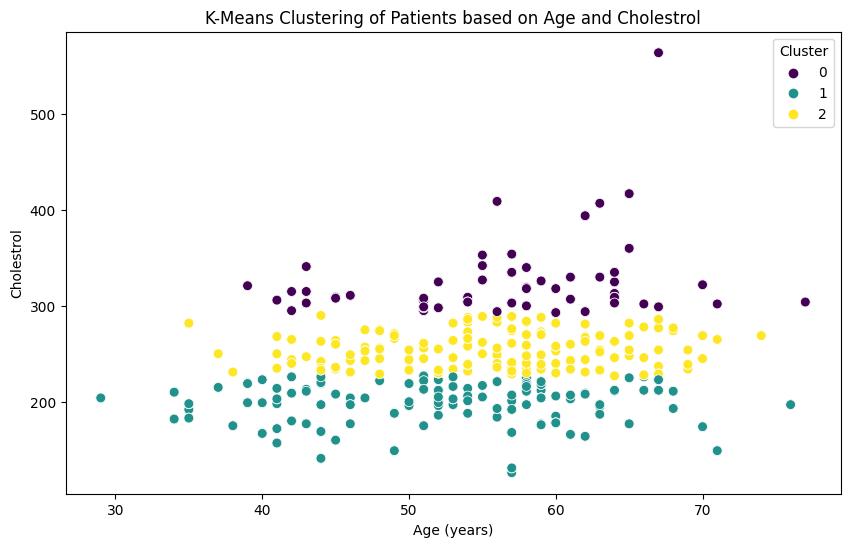

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
csv_file_path = '/kaggle/input/datstrain/LESSDATA.csv'  # Path to your uploaded CSV file
df = pd.read_csv(csv_file_path)


# Selecting specific features for clustering (age and systolic blood pressure) without scaling
X_cluster = df[['age', 'chol']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_cluster)

# Visualize clusters with meaningful feature names
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_cluster['age'], y=X_cluster['chol'], hue=kmeans_labels, palette="viridis", s=50)
plt.title("K-Means Clustering of Patients based on Age and Cholestrol")
plt.xlabel("Age (years)")
plt.ylabel("Cholestrol")
plt.legend(title="Cluster")
plt.show()


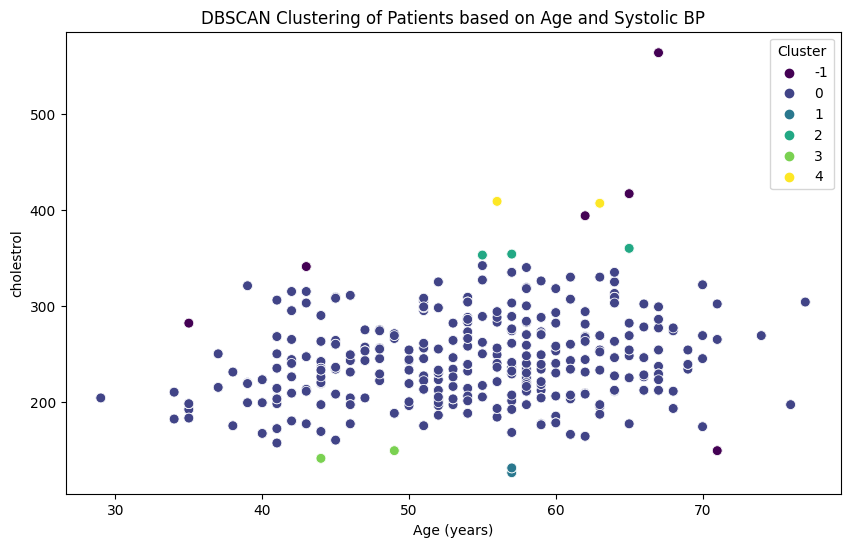

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
csv_file_path = '/kaggle/input/datstrain/LESSDATA.csv'  # Path to your uploaded CSV file
df = pd.read_csv(csv_file_path)


# Selecting specific features (age and systolic blood pressure) without scaling
X_cluster = df[['age', 'chol']].values

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_cluster)

# Visualize DBSCAN clusters with meaningful feature names
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_cluster[:, 0], y=X_cluster[:, 1], hue=dbscan_labels, palette="viridis", s=50)
plt.title("DBSCAN Clustering of Patients based on Age and cholestrol")
plt.xlabel("Age (years)")
plt.ylabel("cholestrol")
plt.legend(title="Cluster")
plt.show()


Prediction (1 = High risk, 0 = Low risk): 0


  0%|          | 0/1 [00:00<?, ?it/s]

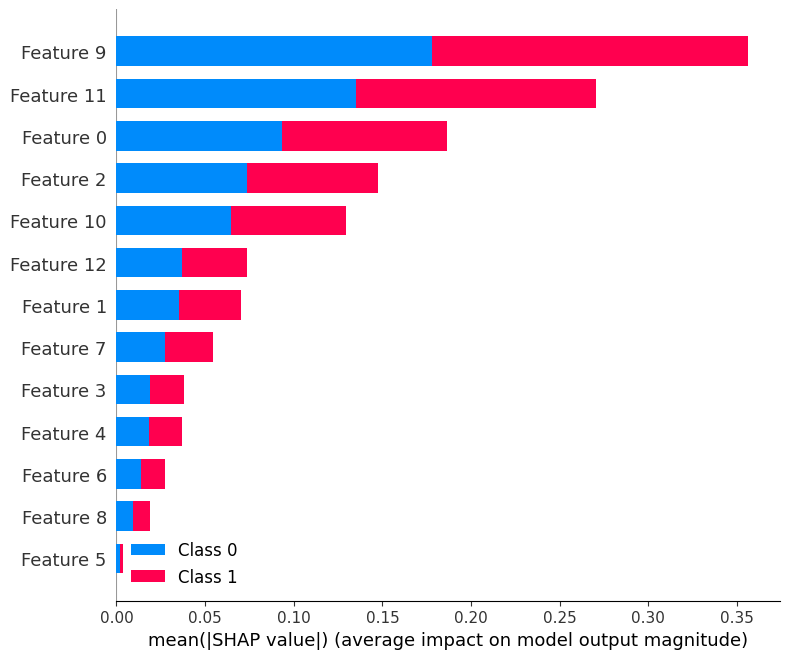

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import shap


# Create a sample user input function
def get_user_input():
    # Replace with real input collection or a predefined dictionary for testing
    user_data = {
        'age': 60,
        'sex' : 1,
        'cp': 2,
        'trestbps': 289,
        'chol': 300,
        'fbs': 0,
        'restecg': 1,
        'thalach': 198,
        'exang': 0,
        'oldpeak': 3.1,
        'slope': 1,
        'ca' : 3,
        'thal' : 2,
    }
    return pd.DataFrame([user_data])

# Collect user input
user_input = get_user_input()


# Scale the user input, but drop 'id' for scaling purposes
user_input_scaled = scaler.transform(user_input)

# Predict using the pre-trained model (assuming it's already trained)
prediction = chi2_models['Stacking'].predict(user_input_scaled)

print("Prediction (1 = High risk, 0 = Low risk):", prediction[0])
# SHAP analysis
explainer = shap.KernelExplainer(chi2_models['Stacking'].predict_proba, X_train_chi2)
shap_values = explainer.shap_values(user_input_scaled)

# Visualize SHAP values
shap.summary_plot(shap_values, user_input_scaled, plot_type="bar")
